# ดึงและสร้างไฟล์ฝนสสน.รายชั่วโมง ของวันที่ต้องการ
* ข้อควรระวัง ห้ามดึงอีก เพราะอาจทำให้ผลเปลี่ยน เมื่อจำนวนสถานีวัดฝนไม่เหมือนเดิม


In [1]:
import requests, os
import pandas as pd
import numpy as np

from math import radians, cos, sin, asin, sqrt

from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from dateutil import rrule

from pathlib import Path

import seaborn as sns 
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline 

## ฟังก์ชั่นดึงข้อมูลฝนจากสสน.

In [2]:
# ฟังก์ชั่นดึงข้อมูลฝนจากสสน.
#คำสั่งนี้ใช้เรียกปริมาณน้ำฝนแบบรายวันจาก URL ของสถาบันสารสนเทศทรัพยากรน้ำ (องค์การมหาชน)
def get_rainfall_hii(df_filter, start, end):
  url_source = 'https://tiservice.hii.or.th/opendata/data_catalog/hourly_rain/'
  path_output = '../1data/3Gauges/rain_hourly/0Sontihn/1firstDownload/'

  #date_start = datetime.strptime(start + '-01', '%Y-%m-%d')
  #date_end = datetime.strptime(end + '-01', '%Y-%m-%d')

  date_start = datetime.strptime(start, '%Y-%m-%d')
  date_end = datetime.strptime(end, '%Y-%m-%d')

  condition = rrule.rrule(rrule.MONTHLY, dtstart=date_start, until=date_end)
  total_process = condition.count()
  i = 1

  for date in condition:
    print('========== Start process (' + str(i) + '/' + str(total_process) + '): ' + date.strftime('%Y-%m') + ' ==========')
    year = date.strftime('%Y')
    month = date.strftime('%m')

    path = path_output + year + '/' + month
    Path(path).mkdir(parents=True, exist_ok=True)

    for code in df_filter['code']:
      # print(code)

      url = url_source + year + '/' + year + month + '/' + code.strip() + '.csv'

      # Download and save file
      result = requests.get(url)
      if result.status_code == 200:
        file_path = Path(path + '/' + code.strip() + '.csv')
        file_path.write_bytes(result.content)
        # print('Downloaded: ' + year + '/' + month + '/' + code.strip())
      else:
        print('Failed: '  + year + '/' + month + '/' + code.strip())
    i += 1

# จัดการข้อมูลฝนสสน.

## ดึงข้อมูลฝนรายชั่วโมงของเดือนที่ต้องการ ที่ตกอยู่ในสถานีในเรดาร์ มาเก็บไว้เป็นไฟล์แยกสถานีก่อน

In [5]:
# อ่านสถานีวัดฝนที่ตกอยู่ในเรดาร์พิษณุโลก
df_pl = pd.read_csv('../1data/1GIS/0base_map_gis/GaugeInCPYBasin_wgs84.csv')
station_pl = df_pl['code']
#station_pl

# เรียก Station ของสสน.จาก URL 
df_hii = pd.read_csv('https://tiservice.hii.or.th/opendata/data_catalog/daily_rain/0station_metadata.csv')
#df_hii.head()

#เรียกข้อมูลสถานีที่อยู่ภายใต้เรดาร์พิษณุโลกจากสถานีทั้งหมดของสสน.
# Strip whitespace in Column Code
df_hii['code'] = df_hii['station_code'].str.strip()
# Filter the DataFrame based on the list of stations
df_filter = df_hii[df_hii['code'].isin(station_pl.str.strip())]
#df_filter


# กำหนดปีเดือนเริ่มต้นและวันที่สิ้นสุดที่ต้องการดึงข้อมูล
start = '2018-07-15'
end = '2018-07-25'

# เรียกฟังก์ชั่นดึงข้อมูลจาก hii
get_rainfall_hii(df_filter, start, end)

========== Start process (1/1): 2018-07 ==========
Failed: 2018/07/ATG011
Failed: 2018/07/ATG021
Failed: 2018/07/ATG031
Failed: 2018/07/ATG032
Failed: 2018/07/ATG042
Failed: 2018/07/ATG051
Failed: 2018/07/ATG052
Failed: 2018/07/ATG072
Failed: 2018/07/ATG081
Failed: 2018/07/ATG082
Failed: 2018/07/ATG091
Failed: 2018/07/ATG092
Failed: 2018/07/ATG101
Failed: 2018/07/ATG111
Failed: 2018/07/ATG112
Failed: 2018/07/ATG121
Failed: 2018/07/ATG122
Failed: 2018/07/ATG131
Failed: 2018/07/ATG132
Failed: 2018/07/ATG141
Failed: 2018/07/ATG142
Failed: 2018/07/ATG151
Failed: 2018/07/ATG152
Failed: 2018/07/ATG161
Failed: 2018/07/ATG162
Failed: 2018/07/ATG171
Failed: 2018/07/ATG181
Failed: 2018/07/ATG182
Failed: 2018/07/BKC001
Failed: 2018/07/BKC002
Failed: 2018/07/BKC003
Failed: 2018/07/BKC004
Failed: 2018/07/BKC005
Failed: 2018/07/BKC006
Failed: 2018/07/BKC007
Failed: 2018/07/BKC008
Failed: 2018/07/FOP002
Failed: 2018/07/FOP003
Failed: 2018/07/FOP004
Failed: 2018/07/FOP005
Failed: 2018/07/FOP006
Failed

## จัดการฝนสสน.ที่ดาวน์โหลดมา ให้อยู่ในลิสต์เดียวกัน

In [7]:
path_output = '../1data/3Gauges/rain_hourly/0Sontihn/1firstDownload/'
#date_start = datetime.strptime(start + '-01', '%Y-%m-%d')
#date_end = datetime.strptime(end + '-01', '%Y-%m-%d')
date_start = datetime.strptime(start, '%Y-%m-%d')
date_end = datetime.strptime(end, '%Y-%m-%d')


condition = rrule.rrule(rrule.MONTHLY, dtstart=date_start, until=date_end)

prec = [] #รวมฝนสถานีที่ดาวน์โหลดมาไว้ในลิสต์นี้

for date in condition:
  year = date.strftime('%Y')
  month = date.strftime('%m')

  target = path_output + year + '/' + month + '/'

  for filename in os.listdir(target):
    station = filename.split('.')[0]
    df = pd.read_csv(target + filename)
    df['station'] = station
    prec.append(df)

#ผลที่ได้คือ ฝนรายชั่วโมงของแต่ละสถานีในเดือนนั้น ๆ 

In [5]:
#prec[:1]

# ดึงฝนเฉพาะวันและชั่วโมงที่ต้องการมาใช้งาน

## จัดข้อมูลฝนให้อยู่ใน dataframe เดียวกัน ดึงเฉพาะคอลัมน์ที่สนใจ

In [8]:
prec_pd=pd.concat(prec).reset_index(drop=False)
# get columns using dataframe subsetting
rain_subset = prec_pd[['date','time', 'rain', 'station']]
rain_subset['full_date']=rain_subset['date'].map(str)+'-'+rain_subset['time'].map(str)

#rain_subset
#ผลลัพธ์จะได้ฝนรายชั่วโมงที่อยู่ใน dataframe เดียวกันของเดือนนั้น ๆ แล้วค่อยไปดึงเฉพาะชั่วโมงของวันที่ต้องการจาก full_date

## ดึงฝนแต่ละชั่วโมงในวันที่ต้องการ แล้วส่งออกเป็น csv ในโฟลเดอร์ผลลัพธ์

In [12]:
# Generate date range
start_date = datetime(2018, 7, 15)
end_date = datetime(2018, 7, 25)
date_range = [start_date + timedelta(days=x) for x in range((end_date - start_date).days + 1)]

# Convert dates to required format
dt_txt = [date.strftime('%Y-%m-%d-') for date in date_range]

hr_txt = rain_subset['time'].unique()
out_rain_hr_path = '../1data/3Gauges/rain_hourly/0Sontihn/1firstDownload/0Hourly/'

for d in dt_txt:
    for h in hr_txt:
        dh = d + h
        dt = datetime.strptime(dh, '%Y-%m-%d-%H:%M')
        print(dh + '>>>')
        rain_ = rain_subset[rain_subset['full_date'] == str(dh)]
        
        # qc 3 ค่า >> nan '-' -999.0
        df_rain_pl = rain_.merge(df_filter, left_on='station', right_on='code')        
        df_ = df_rain_pl.drop(df_rain_pl[df_rain_pl['rain'] == '-'].index)
        df_ = df_.drop(df_[df_['rain'] == -999.0].index)
        df_ = df_.dropna().reset_index(drop=True)              
        
        # ส่งออกฝนรายชั่วโมง csv
        file_hr = dt.strftime('%Y%m%d%H') + '.csv'
        df_.to_csv(out_rain_hr_path + file_hr, encoding='utf-8-sig')

2018-07-15-00:00>>>
2018-07-15-01:00>>>
2018-07-15-02:00>>>
2018-07-15-03:00>>>
2018-07-15-04:00>>>
2018-07-15-05:00>>>
2018-07-15-06:00>>>
2018-07-15-07:00>>>
2018-07-15-08:00>>>
2018-07-15-09:00>>>
2018-07-15-10:00>>>
2018-07-15-11:00>>>
2018-07-15-12:00>>>
2018-07-15-13:00>>>
2018-07-15-14:00>>>
2018-07-15-15:00>>>
2018-07-15-16:00>>>
2018-07-15-17:00>>>
2018-07-15-18:00>>>
2018-07-15-19:00>>>
2018-07-15-20:00>>>
2018-07-15-21:00>>>
2018-07-15-22:00>>>
2018-07-15-23:00>>>
2018-07-16-00:00>>>
2018-07-16-01:00>>>
2018-07-16-02:00>>>
2018-07-16-03:00>>>
2018-07-16-04:00>>>
2018-07-16-05:00>>>
2018-07-16-06:00>>>
2018-07-16-07:00>>>
2018-07-16-08:00>>>
2018-07-16-09:00>>>
2018-07-16-10:00>>>
2018-07-16-11:00>>>
2018-07-16-12:00>>>
2018-07-16-13:00>>>
2018-07-16-14:00>>>
2018-07-16-15:00>>>
2018-07-16-16:00>>>
2018-07-16-17:00>>>
2018-07-16-18:00>>>
2018-07-16-19:00>>>
2018-07-16-20:00>>>
2018-07-16-21:00>>>
2018-07-16-22:00>>>
2018-07-16-23:00>>>
2018-07-17-00:00>>>
2018-07-17-01:00>>>


## อ่านบางไฟล์เพื่อตรวจสอบ

In [9]:
## อ่านบางไฟล์เพื่อตรวจสอบ
# ก๊อปปี้แมนนวล '2Final_hourly_dates' เพื่อเอาไว้วิเคราะห์
file_path = '../1data/3Gauges/rain_hourly/0Sontihn/2Final_hourly_dates/2018071719.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head())

# Get basic information about the dataframe
print(df.info())

   Unnamed: 0        date   time  rain station         full_date station_code  \
0           0  2018-07-17  19:00   0.0    BARI  2018-07-17-19:00         BARI   
1           1  2018-07-17  19:00   2.4    BBON  2018-07-17-19:00         BBON   
2           2  2018-07-17  19:00   1.2    BDLH  2018-07-17-19:00         BDLH   
3           3  2018-07-17  19:00   0.0    BHMN  2018-07-17-19:00         BHMN   
4           4  2018-07-17  19:00   0.0    BKDN  2018-07-17-19:00         BKDN   

             station_name   latitude   longitude    tambon          amphoe  \
0  ศูนย์อปพร. อบต.บ้านไร่  15.082674   99.519360   บ้านไร่         บ้านไร่   
1             อบต.แจ้ซ้อน  18.816986   99.500030   แจ้ซ้อน        เมืองปาน   
2               ทต.ลานหอย  17.008568   99.582950    ลานหอย  บ้านด่านลานหอย   
3            อบต.ห้วยมุ่น  17.809134  100.939430  ห้วยมุ่น          น้ำปาด   
4              อบต.เขาทอง  15.570725  100.183205    เขาทอง       พยุหะคีรี   

    province      basin              sub_bas

## ทดสอบพลอตค่าฝนชั่วโมงที่สนใจ

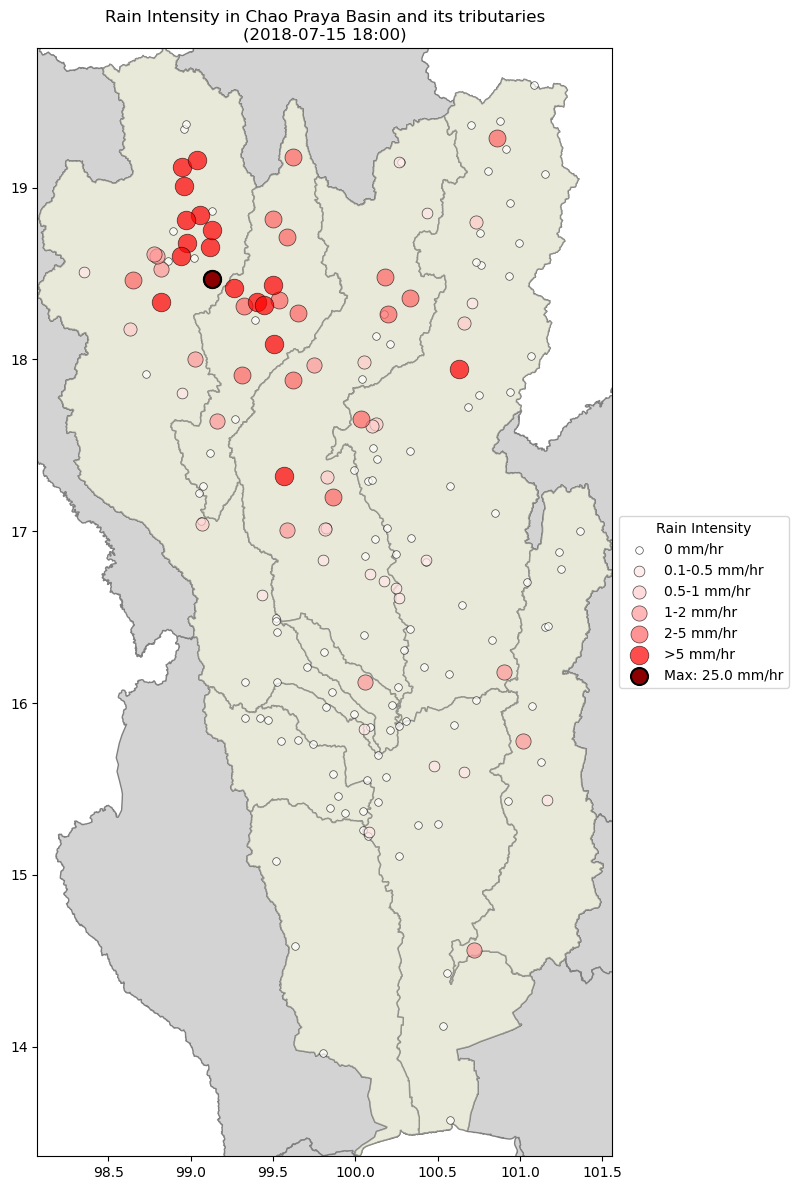

Total number of stations: 179
Stations with rainfall 0 mm/hr: 108
Stations with rainfall 0.1-0.5 mm/hr: 18
Stations with rainfall 0.5-1 mm/hr: 9
Stations with rainfall 1-2 mm/hr: 11
Stations with rainfall 2-5 mm/hr: 15
Stations with rainfall >5 mm/hr: 18
Station with max rainfall: ทต.ทาสบเส้า (25.0 mm/hr)


In [10]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Read the shapefiles and CSV file
basin_map = gpd.read_file('../1data/1GIS/0base_map_gis/MainBasin_ONWR_Law_UTM47N.shp', encoding="UTF-8")
all_basin = gpd.read_file('../1data/1GIS/0base_map_gis/Chaophraya_Basins_others_ONWR_Law_WGS84Geo.shp')
file_path = '../1data/3Gauges/rain_hourly/0Sontihn/2Final_hourly_dates/2018071719.csv'
df = pd.read_csv(file_path)

# Convert the dataframe to a GeoDataFrame
geo_df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
geo_df.set_crs(epsg=4326, inplace=True)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the basins
basin_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey', edgecolor='grey', linewidth=1)
all_basin.to_crs(epsg=4326).plot(ax=ax, color='lightyellow', edgecolor='grey', linewidth=1, alpha=0.5)

# Define rain intensity classes
rain_classes = [0, 0.1, 0.5, 1, 2, 5, np.inf]
colors = ['#FFFFFF', '#FFE6E6', '#FFCCCC', '#FF9999', '#FF6666', '#FF0000']
labels = ['0', '0.1-0.5', '0.5-1', '1-2', '2-5', '>5']

# Plot all stations
for i, (lower, upper) in enumerate(zip(rain_classes[:-1], rain_classes[1:])):
    mask = (geo_df['rain'] >= lower) & (geo_df['rain'] < upper)
    ax.scatter(geo_df.loc[mask, 'longitude'], geo_df.loc[mask, 'latitude'], 
               c=colors[i], s=(i+1)*30, alpha=0.7, edgecolor='black', linewidth=0.5,
               label=f'{labels[i]} mm/hr')

# Highlight the station with the highest rainfall
max_rain_station = geo_df.loc[geo_df['rain'].idxmax()]
ax.scatter(max_rain_station['longitude'], max_rain_station['latitude'], 
           c='darkred', s=150, alpha=1, edgecolor='black', linewidth=1.5,
           label=f'Max: {max_rain_station["rain"]:.1f} mm/hr')

# Set the extent to focus on Chao Praya basin
ax.set_xlim(all_basin.total_bounds[0], all_basin.total_bounds[2])
ax.set_ylim(all_basin.total_bounds[1], all_basin.total_bounds[3])

# Add legend
ax.legend(title='Rain Intensity', loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_title('Rain Intensity in Chao Praya Basin and its tributaries\n(2018-07-15 18:00)')
plt.tight_layout()
plt.savefig('../4output/rain_intensity_map_2018071518_red.jpg', dpi=300, bbox_inches='tight')
plt.show()

# Print statistics
print(f"Total number of stations: {len(geo_df)}")
for i, (lower, upper) in enumerate(zip(rain_classes[:-1], rain_classes[1:])):
    count = ((geo_df['rain'] >= lower) & (geo_df['rain'] < upper)).sum()
    print(f"Stations with rainfall {labels[i]} mm/hr: {count}")
print(f"Station with max rainfall: {max_rain_station['station_name']} ({max_rain_station['rain']:.1f} mm/hr)")

# พลอตรายชั่วโมงในวันที่สนใจ

C:\Users\Admin\AppData\Local\Temp\ipykernel_8696\2191945419.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 0.9, 0.95])


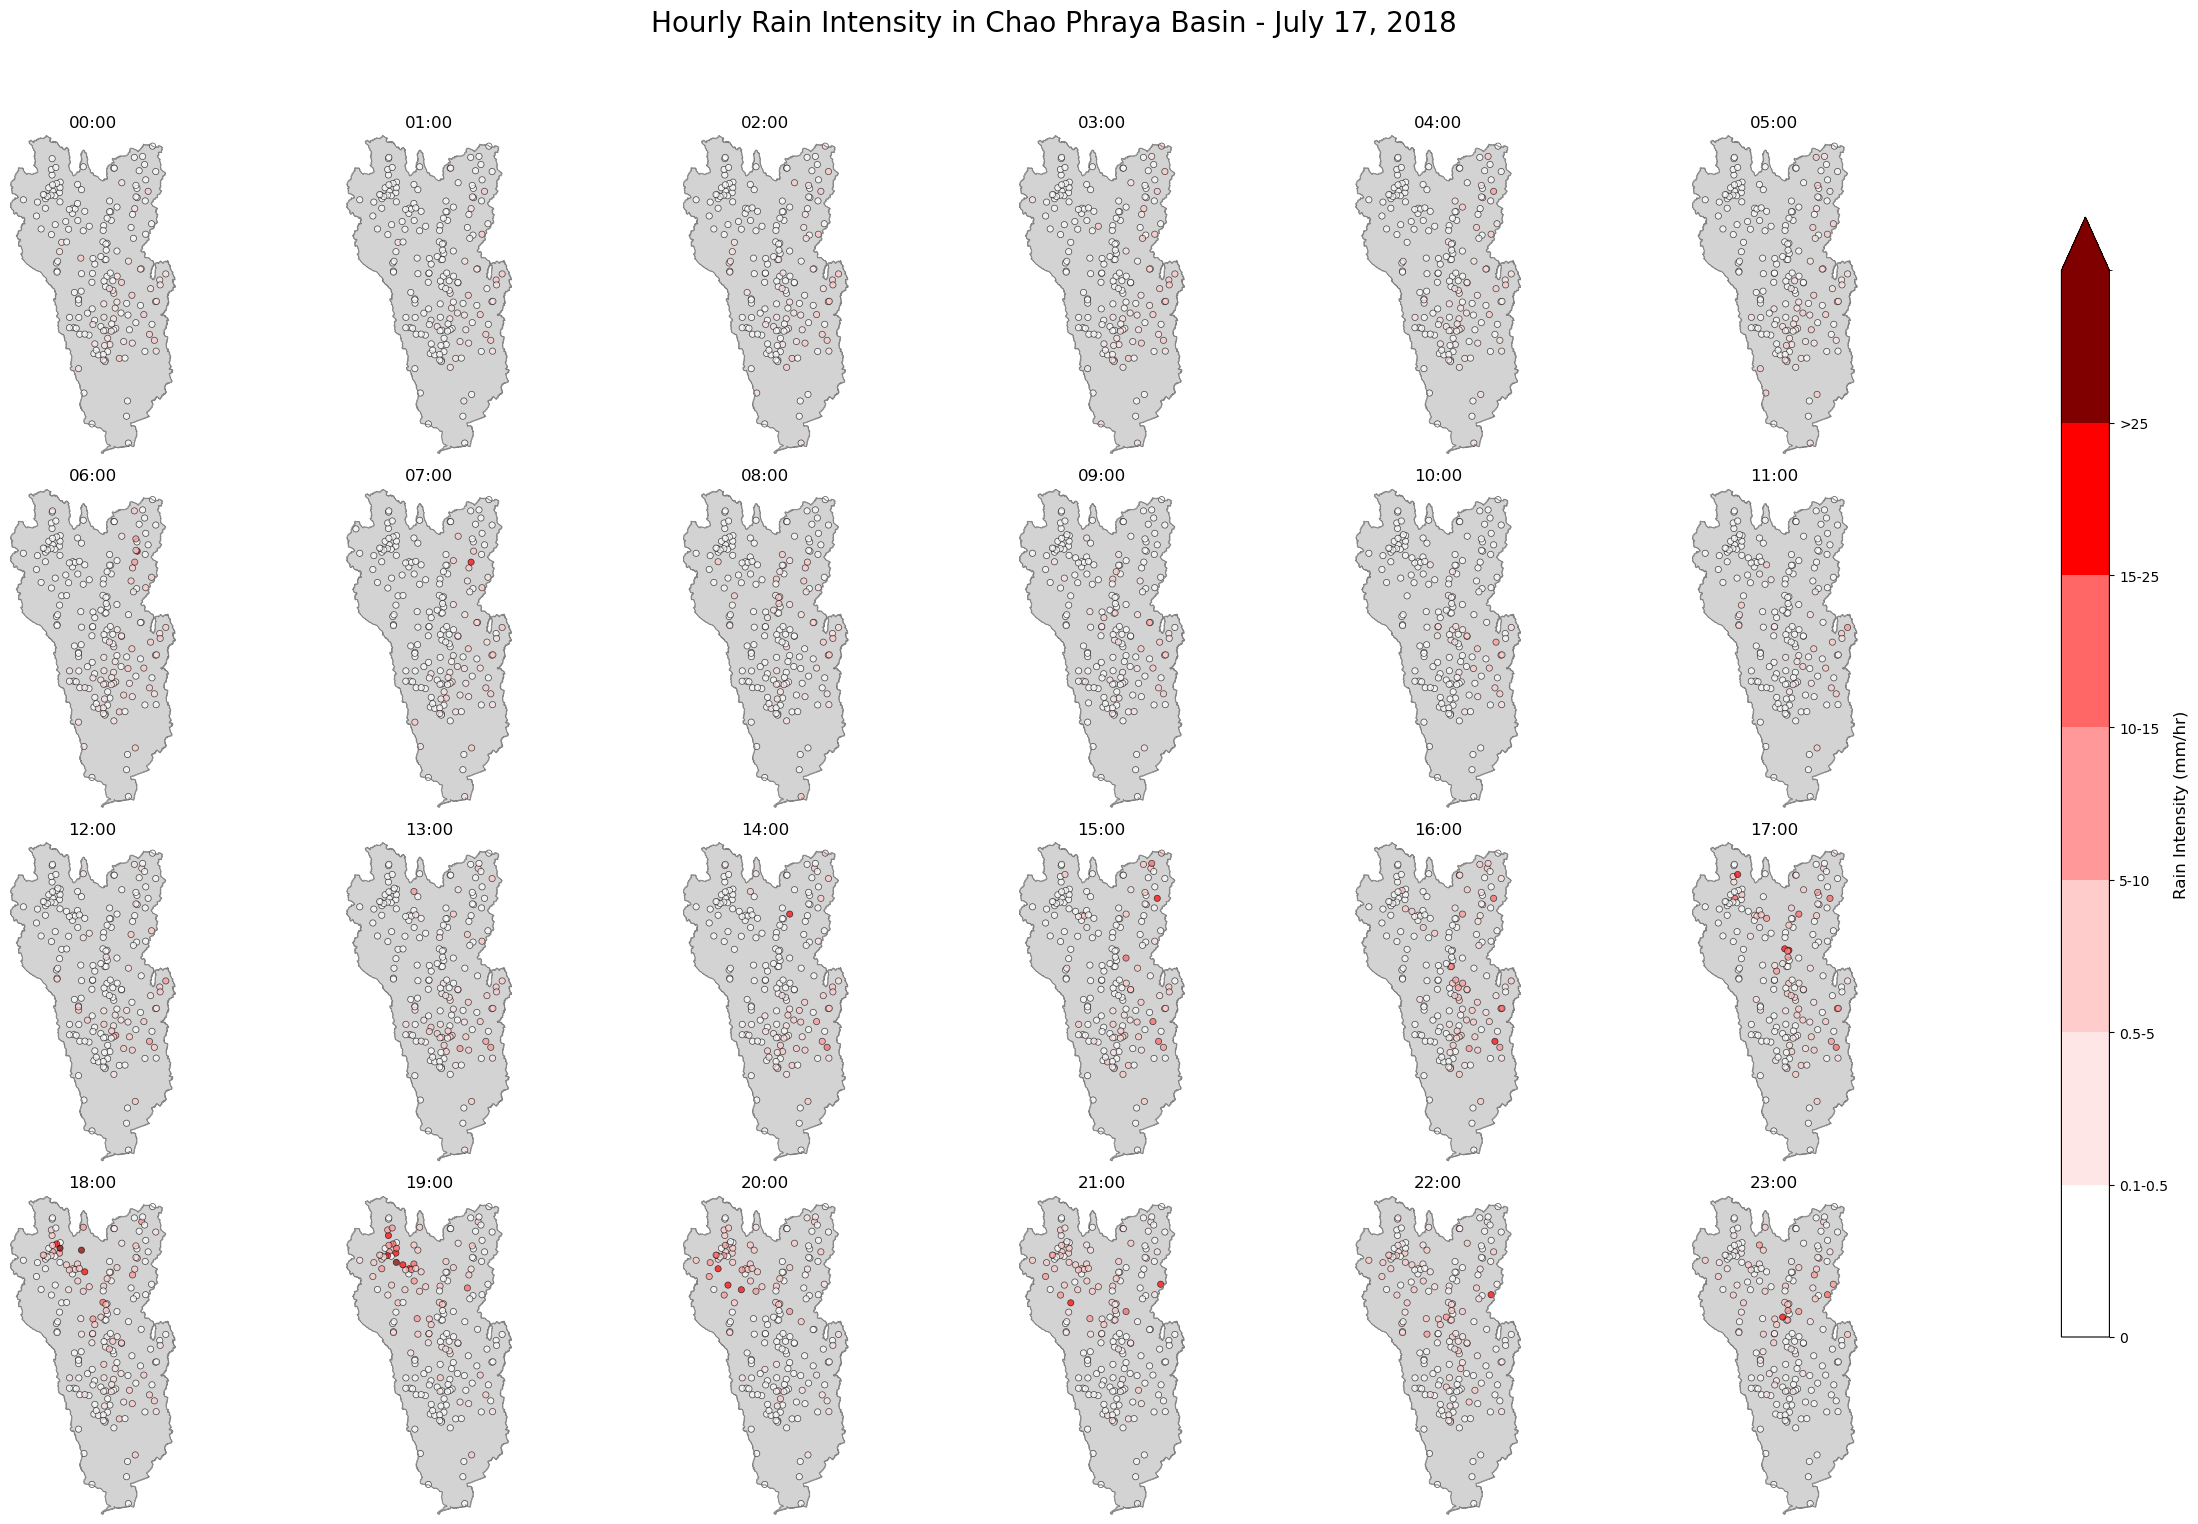


Total number of station readings: 4286
Readings with rainfall 0 mm/hr: 3038 (70.9%)
Readings with rainfall 0.1-0.5 mm/hr: 624 (14.6%)
Readings with rainfall 0.5-5 mm/hr: 507 (11.8%)
Readings with rainfall 5-10 mm/hr: 71 (1.7%)
Readings with rainfall 10-15 mm/hr: 21 (0.5%)
Readings with rainfall 15-25 mm/hr: 22 (0.5%)
Readings with rainfall >25 mm/hr: 3 (0.1%)
Maximum rainfall: 38.6 mm/hr at station รร.อนุบาล ทต.สันกำแพง at 2018-07-17-18:00


In [12]:
'''
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.cm import ScalarMappable
import glob
import os

# Read the shapefile for Chao Phraya basin
chao_phraya_basins = gpd.read_file('../1data/1GIS/0base_map_gis/Chaophraya_Basins_others_Boundary_WGS84Geo.shp')

# Ensure the CRS is set to EPSG:4326 (WGS84)
chao_phraya_basins = chao_phraya_basins.to_crs(epsg=4326)

# Check and fix the geometry if needed
chao_phraya_basins = chao_phraya_basins[chao_phraya_basins.geometry.is_valid]

# Dissolve all sub-basins into one shape
chao_phraya_outline = chao_phraya_basins.dissolve()

# Define rain intensity classes and colors
rain_classes = [0, 0.1, 0.5, 5, 10, 15, 25, 100]  # Changed upper bound to 100
colors = ['#FFFFFF', '#FFE6E6', '#FFCCCC', '#FF9999', '#FF6666', '#FF0000', '#800000']
labels = ['0', '0.1-0.5', '0.5-5', '5-10', '10-15', '15-25', '>25']
cmap = ListedColormap(colors)
norm = BoundaryNorm(rain_classes, cmap.N)

# Read all CSV files at once
directory = '../1data/3Gauges/rain_hourly/0Sontihn/2Final_hourly_dates/'
all_files = glob.glob(os.path.join(directory, '20180717*.csv'))
all_files.sort()

if not all_files:
    print("No data files found for July 17, 2018.")
    exit()

# Read all data into a single DataFrame and convert to GeoDataFrame
all_data = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
geo_df = gpd.GeoDataFrame(all_data, geometry=gpd.points_from_xy(all_data.longitude, all_data.latitude), crs="EPSG:4326")

# Create the 4x6 subplots
fig, axs = plt.subplots(4, 6, figsize=(24, 16))
fig.suptitle('Hourly Rain Intensity in Chao Phraya Basin - July 17, 2018', fontsize=20)

for hour in range(24):
    row, col = divmod(hour, 6)
    ax = axs[row, col]
    
    # Plot the outline of Chao Phraya basin
    chao_phraya_outline.boundary.plot(ax=ax, color='grey', linewidth=0.5)
    
    # Plot all sub-basins within Chao Phraya
    chao_phraya_basins.plot(ax=ax, color='lightgrey', edgecolor='grey', linewidth=0.5)
    
    # Filter data for this hour
    hour_data = geo_df[geo_df['time'] == f'{hour:02d}:00']
    
    if not hour_data.empty:
        scatter = ax.scatter(hour_data['longitude'], hour_data['latitude'], 
                             c=hour_data['rain'].clip(upper=100), cmap=cmap, norm=norm,
                             s=20, alpha=0.7, edgecolor='black', linewidth=0.5)
    else:
        ax.text(0.5, 0.5, f"No data for {hour:02d}:00", ha='center', va='center', transform=ax.transAxes)
    
    ax.set_title(f'{hour:02d}:00')
    ax.axis('off')
    
    # Set consistent limits for all subplots based on the Chao Phraya basins bounds
    bounds = chao_phraya_basins.total_bounds
    ax.set_xlim(bounds[0], bounds[2])
    ax.set_ylim(bounds[1], bounds[3])

# Add a color bar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # This line is necessary for the colorbar to work correctly
cbar = fig.colorbar(sm, cax=cbar_ax, extend='max')
cbar.set_label('Rain Intensity (mm/hr)', fontsize=12)
cbar.set_ticks(rain_classes[:-1])
cbar.set_ticklabels(labels)

plt.tight_layout(rect=[0, 0.03, 0.9, 0.95])
plt.savefig('../4output/hourly_rain_intensity_grid_20180717_chao_phraya_subbasins_fixed.jpg', dpi=300, bbox_inches='tight')
plt.show()

# Print overall statistics
total_stations = len(geo_df)
print(f"\nTotal number of station readings: {total_stations}")
for i, (lower, upper) in enumerate(zip(rain_classes[:-1], rain_classes[1:])):
    count = ((geo_df['rain'] >= lower) & (geo_df['rain'] < upper)).sum()
    print(f"Readings with rainfall {labels[i]} mm/hr: {count} ({count/total_stations*100:.1f}%)")
max_rain = geo_df['rain'].max()
max_rain_info = geo_df.loc[geo_df['rain'].idxmax()]
print(f"Maximum rainfall: {max_rain:.1f} mm/hr at station {max_rain_info['station_name']} at {max_rain_info['full_date']}")
'''